In [1]:
import pandas as pd

from dpks.quant_matrix import QuantMatrix
from dpks.differential_testing import DifferentialTest

quant_matrix = QuantMatrix(
    quantification_file="../tests/input_files/de_matrix.tsv",
    design_matrix_file="../tests/input_files/de_design_matrix.tsv"
)

/home/erikh/dpks/test-venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
quantified_data = (quant_matrix.filter()
        .normalize(
            method="mean",
            log_transform=True,
            use_rt_sliding_window_filter=True,
            minimum_data_points=100,
            stride=5,
            use_overlapping_windows=True,
            rt_unit="minutes"
        )
        #.quantify(method="top_n", top_n=1)
)

Mean of empty slice


In [3]:
compared_data = quantified_data.compare_groups(
            method="anova",
            comparisons = (4,6),
            min_samples_per_group=2,
            level="precursor",
            multiple_testing_correction_method="fdr_tsbh"
        )

compared_data.to_df()

61.79831349468315 5.2722622596489295


,PeptideSequence,Charge,Decoy,Protein,RetentionTime,PeptideQValue,ProteinQValue,PrecursorId,DEScore,Group4Mean,...,AAS_P2009_205,AAS_P2009_212,AAS_P2009_214,AAS_P2009_221,AAS_P2009_230,AAS_P2009_232,AAS_P2009_239,AAS_P2009_241,AAS_P2009_248,AAS_P2009_250
0,YVASYLLAALGGNSSPSAK,2,0,sp|P99027|RLA2_MOUSE,1075.710,0.000000,0.0,YVASYLLAALGGNSSPSAK_2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TGTLTTSETAHNM(UniMod:35)K,3,0,sp|P32324|EF2_YEAST,1648.580,0.000000,0.0,TGTLTTSETAHNM(UniMod:35)K_3,NaN,NaN,...,19.017699,NaN,19.150953,NaN,NaN,18.744640,NaN,NaN,NaN,NaN
2,THNDIIHNENM(UniMod:35)R,3,0,sp|P26040|EZRI_MOUSE,1779.425,0.008803,0.0,THNDIIHNENM(UniMod:35)R_3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,DSVTYTEHAK,2,0,sp|P02309|H4_YEAST,1830.600,0.000261,0.0,DSVTYTEHAK_2,NaN,NaN,...,NaN,NaN,NaN,17.319610,NaN,NaN,NaN,NaN,NaN,NaN
4,IHMGNC(UniMod:4)AENTAK,3,0,sp|Q8QZT1|THIL_MOUSE,1842.815,0.003430,0.0,IHMGNC(UniMod:4)AENTAK_3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16674,NAADM(UniMod:35)VLLDDNFASIVTGVEEGR,3,0,sp|Q9Z1W8|AT12A_MOUSE,7308.245,0.000000,0.0,NAADM(UniMod:35)VLLDDNFASIVTGVEEGR_3,0.056047,21.217872,...,21.505038,20.653517,21.570208,20.557945,21.520732,20.639346,21.337085,21.721375,20.412262,20.787256
16675,SNLVGMGVIPLEYLPGETADSLGLTGR,3,0,sp|P28271|ACOHC_MOUSE,7311.770,0.003138,0.0,SNLVGMGVIPLEYLPGETADSLGLTGR_3,0.012757,20.114305,...,NaN,19.854239,20.397748,19.481464,20.701454,19.606174,NaN,20.604281,19.662041,19.849015
16676,LFSGEDVLYEGDSIVYPVFINEAAYYEK,3,0,sp|Q91XE4|ACY3_MOUSE,7315.150,0.009142,0.0,LFSGEDVLYEGDSIVYPVFINEAAYYEK_3,NaN,NaN,...,NaN,NaN,22.149340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16677,LLPWFDGMLEADEAYFK,2,0,sp|P14540|ALF_YEAST,7331.240,0.000000,0.0,LLPWFDGMLEADEAYFK_2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='Log2FoldChange4-6', ylabel='LogPValues4-6'>

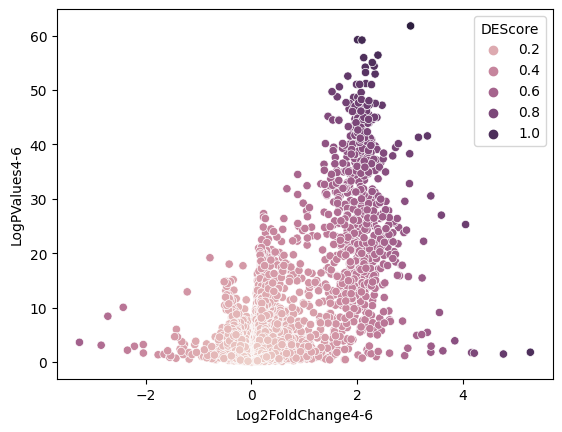

In [5]:
import seaborn as sns
import numpy as np

compared_data.row_annotations['LogPValues4-6'] = compared_data.row_annotations['PValues4-6'].apply(lambda x: -np.log(x))

sns.scatterplot(data=compared_data.row_annotations, x = 'Log2FoldChange4-6', y ='LogPValues4-6', hue = 'DEScore')

In [6]:
compared_data.row_annotations["Species"] = np.where(compared_data.row_annotations["Protein"].str.contains("MOUSE"), "MOUSE",
                            np.where(compared_data.row_annotations["Protein"].str.contains("YEAST"), "YEAST",
                            np.where(compared_data.row_annotations["Protein"].str.contains("RT"), "RT", "NONE")))

<AxesSubplot:xlabel='Group6Mean', ylabel='Log2FoldChange4-6'>

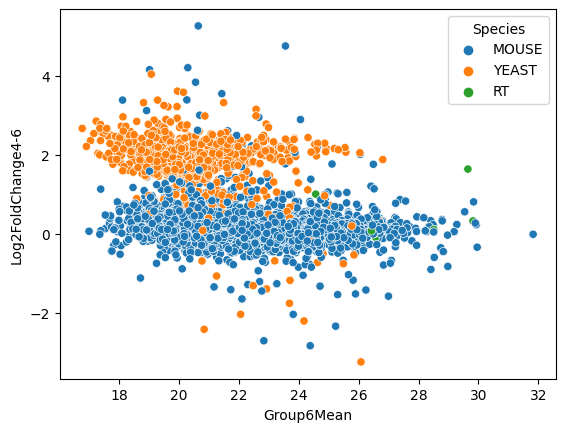

In [7]:
sns.scatterplot(
    data=compared_data.row_annotations,
    x="Group6Mean",
    y="Log2FoldChange4-6",
    hue="Species"
)

In [6]:
cutoffs = np.linspace(0.0, 1.0, num=10000)

In [7]:
precision_roc_data = []

for cutoff in cutoffs[1:]:

    yeast_ids = compared_data.row_annotations[
        (compared_data.row_annotations["CorrectedPValue"] <= cutoff) &
        (compared_data.row_annotations["Species"] == "YEAST")
    ].shape[0]

    yeast_fn = compared_data.row_annotations[
        (compared_data.row_annotations["CorrectedPValue"] > cutoff) &
        (compared_data.row_annotations["Species"] == "YEAST")
    ].shape[0]

    mouse_ids = compared_data.row_annotations[
        (compared_data.row_annotations["CorrectedPValue"] <= cutoff) &
        (compared_data.row_annotations["Species"] == "MOUSE")
    ].shape[0]

    mouse_tn = compared_data.row_annotations[
        (compared_data.row_annotations["CorrectedPValue"] > cutoff) &
        (compared_data.row_annotations["Species"] == "MOUSE")
    ].shape[0]

    recall = yeast_ids / (yeast_ids + yeast_fn)

    precision = yeast_ids / (yeast_ids + mouse_ids)
    fpr = mouse_ids / (mouse_ids + mouse_tn)

    precision_roc_data.append(
        {
            "recall": recall,
            "precision": precision,
            "fpr": fpr
        }
    )


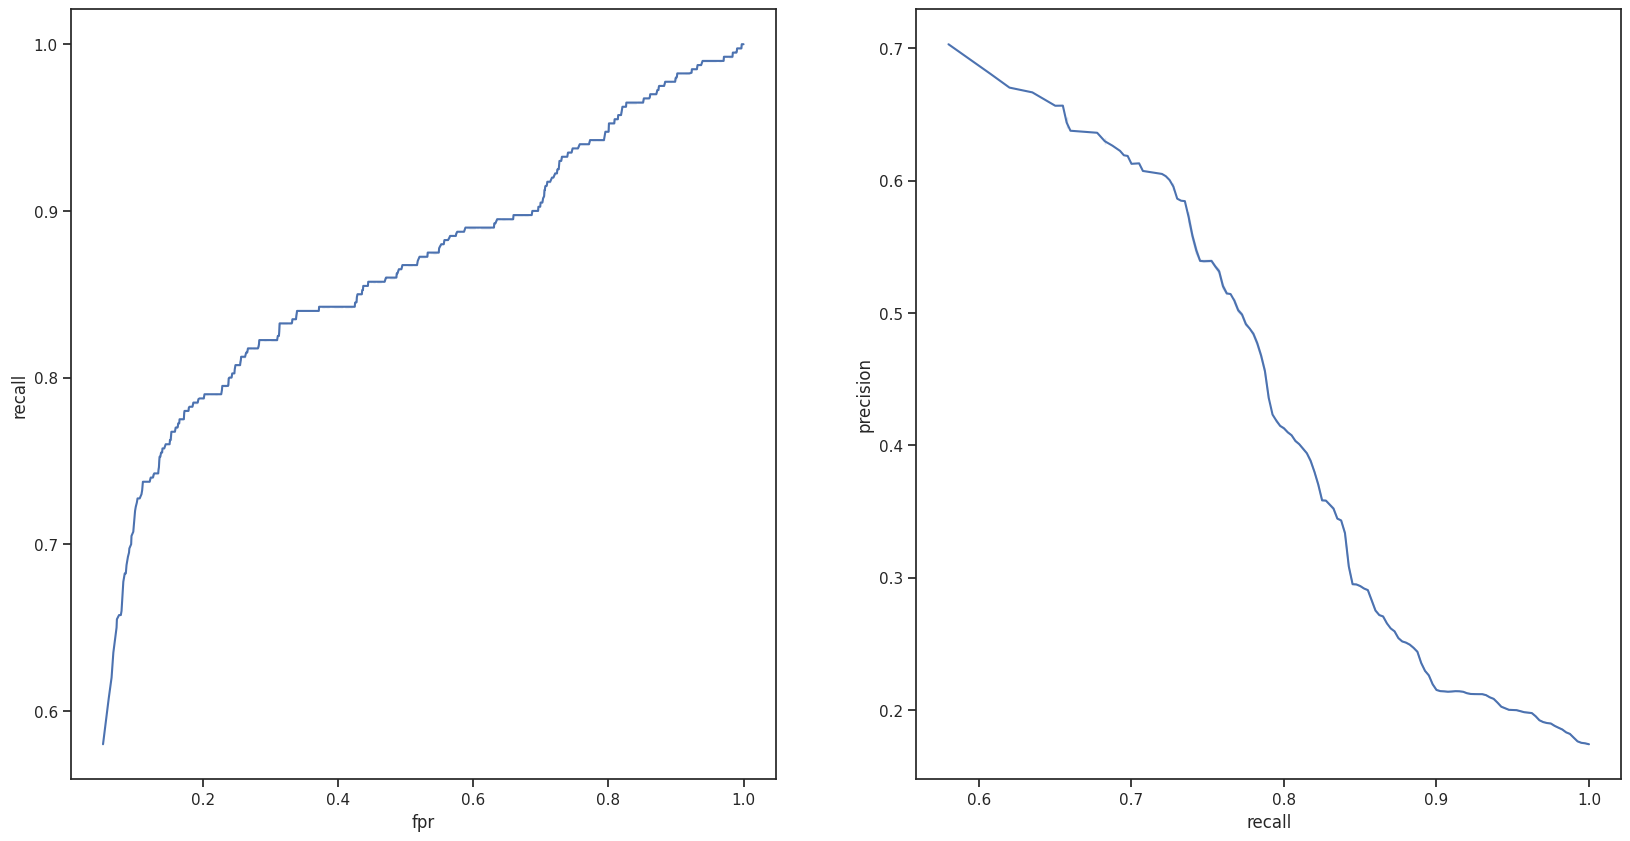

In [8]:
from matplotlib import gridspec
import matplotlib.pyplot as plt

sns.set(font_scale=1, style="ticks")

fig = plt.figure()

gs = gridspec.GridSpec(
    1, 2,
    width_ratios=[1, 1]
)

ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

sns.lineplot(
    data=pd.DataFrame(precision_roc_data),
    x="fpr",
    y="recall",
    ax=ax1,
)

sns.lineplot(
    data=pd.DataFrame(precision_roc_data),
    x="recall",
    y="precision",
    ax=ax2
)
fig.figure.set_size_inches(20, 10)